In [117]:
import pandas as pd
from functions import *
import seaborn
import csv
import subprocess
import os
path = 'C:/Users/6997619/Documents/GitHub projects/DHZW-simulation_Sim-2APL/src/main/resources/calibration/'

In [118]:
X_train = pd.read_csv(path+"data/X_train.csv")
X_test = pd.read_csv(path+"data/X_test.csv")

## Calculate fitness

In [119]:
output = pd.read_csv(path+'output/output_proportions.csv')
output

,CAR_DRIVER,CAR_PASSENGER,BIKE,BUS_TRAM,TRAIN,WALK
0,0.008000,0.140000,0.384000,0.108000,0.004000,0.356000
1,0.023810,0.230159,0.365079,0.075397,0.000000,0.305556
2,0.015936,0.155378,0.362550,0.091633,0.023904,0.350598
3,0.015936,0.175299,0.346614,0.127490,0.007968,0.326693
4,0.031621,0.110672,0.351779,0.130435,0.007905,0.367589
5,0.008000,0.244000,0.308000,0.144000,0.012000,0.284000
6,0.008000,0.172000,0.360000,0.068000,0.008000,0.384000
7,0.015936,0.203187,0.310757,0.095618,0.019920,0.354582
8,0.023810,0.095238,0.353175,0.194444,0.011905,0.321429
9,0.015936,0.306773,0.358566,0.059761,0.011952,0.247012


In [120]:
observed_values = pd.read_csv(path+'data/observed_mode_choice.csv')
observed_values

,CAR_DRIVER,CAR_PASSENGER,BIKE,BUS_TRAM,TRAIN,WALK
0,0.29,0.12,0.16,0.15,0.03,0.25


In [121]:
# for each mode choice, calculate the difference between observed and simulated data. weight by obrserved data
df = observed_values.values[0] * abs(output - observed_values.values[0]) * 100

# aggregate in one fitness score
df['fitness'] = df.sum(axis=1)

print(df)

# leave only the fitness score
df = df['fitness']

    CAR_DRIVER  CAR_PASSENGER      BIKE  BUS_TRAM     TRAIN      WALK  \
0     8.178000       0.240000  3.584000  0.630000  0.078000  2.650000   
1     7.719524       1.321905  3.281270  1.119048  0.090000  1.388889   
2     7.947849       0.424542  3.240797  0.875498  0.018287  2.514940   
3     7.947849       0.663586  2.985817  0.337649  0.066096  1.917331   
4     7.493004       0.111937  3.068458  0.293478  0.066285  2.939723   
5     8.178000       1.488000  2.368000  0.090000  0.054000  0.850000   
6     8.178000       0.624000  3.200000  1.230000  0.066000  3.350000   
7     7.947849       0.998247  2.412112  0.815737  0.030239  2.614542   
8     7.719524       0.297143  3.090794  0.666667  0.054286  1.785714   
9     7.947849       2.241275  3.177052  1.353586  0.054143  0.074701   
10    8.178000       0.432000  3.776000  1.230000  0.066000  2.850000   
11    8.410000       1.355181  2.259277  0.623494  0.077952  2.585341   
12    8.178000       0.192000  3.712000  0.570000  

## Organising the output

In [122]:
y_train = df.head(X_train.shape[0])
y_test = df.tail(X_test.shape[0])

## Surrogate model

### Compute the XGBoost Surrogate

In [123]:
# This surrogate will not have multiple iterations. It will run on the entire budget of evaluations.
surrogate_model_XGBoost = fit_surrogate_model(X_train, y_train)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.9854
Function value obtained: 1.5110
Current minimum: 1.5110
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.8278
Function value obtained: 0.9294
Current minimum: 0.9294
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.6981
Function value obtained: 1.4678
Current minimum: 0.9294
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3979
Function value obtained: 2.1018
Current minimum: 0.9294
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 1.1320
Function value obtained: 1.4636
Current minimum: 0.9294
Iteration No: 6 started. Evaluating

### Predict test set surrogate model

In [124]:
y_hat_test = surrogate_model_XGBoost.predict(X_test)

### Evaluate surrogate model on the test set

In [125]:
model_fitness = mean_squared_error(y_test, y_hat_test)

print(model_fitness)

2.0928386169551603


### Find optimal parameter set

In [149]:
# Set the ABM parameters and support
parameters_range = np.array([
    (-0.9, 0.9),
    (-0.9, 0.9),
    (-0.9, 0.9),
    (-0.9, 0.9),
    (-0.9, 0.9)])

pool_size = 1000000
pool = get_sobol_samples(parameters_range.shape[0], pool_size, parameters_range) # generate (with the Sobol sampling) a large set of parameters combinations. Quantity based on the budget

In [150]:
Y_hat = surrogate_model_XGBoost.predict(pool)

In [151]:
best_parameter_set = pool[np.argmin(Y_hat)]
best_parameter_set_with_fitness = np.append(best_parameter_set, max(Y_hat))

In [152]:
best_parameter_set = pd.DataFrame([best_parameter_set], columns=['alphaLeisureCarDriver', 'alphaLeisureCarPassenger', 'alphaLeisureTrain', 'alphaLeisureTram', 'betaChangesTransportLeisure'])
print(best_parameter_set)
best_parameter_set.to_csv(path+"optimal_parameterset/best_parameterset.csv", header=True, index=None)

   alphaLeisureCarDriver  alphaLeisureCarPassenger  alphaLeisureTrain  \
0              -0.553258                 -0.680699          -0.475035   

   alphaLeisureTram  betaChangesTransportLeisure  
0         -0.896828                    -0.093178  


### Test optimal parameter set with Sim2APL

In [153]:
with open(path+'data/parameter_labels.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    params = [row['parameter'] for row in reader]

best_parameterset_full = pd.DataFrame()
for label in params:
    best_parameterset_full[label] = [1.0]
best_parameterset_full.update(best_parameter_set)
best_parameterset_full.to_csv(path + "optimal_parameterset/parameterset.csv", index=False)

In [154]:
config = "--config src/main/resources/config_DHZW_full.toml"
modeliberal = "--mode-liberal 0.5"
modeconservative = "--mode-conservative 0.5"
output = "-o output/deskrun"
outputPath = " --output_file src/main/resources/calibration/optimal_parameterset/output_proportions.csv"
parametersPath = "--parameter_file src/main/resources/calibration/optimal_parameterset/parameterset.csv"

cmd = "java -cp target/sim2apl-dhzw-simulation-1.0-SNAPSHOT-jar-with-dependencies.jar main.java.nl.uu.iss.ga.Simulation" + " " + config + " " + modeliberal + " " + modeconservative + " " + output + " " + outputPath + " " + parametersPath
arg = f'--parameterset_index={1}'
full_command = f'{cmd} {arg}'

os.chdir('C:/Users/6997619/Documents/GitHub projects/DHZW-simulation_Sim-2APL')

In [155]:
df = pd.DataFrame(columns=["CAR_DRIVER", "CAR_PASSENGER", "BIKE", "BUS_TRAM", "TRAIN", "WALK"])
df.to_csv(path + "optimal_parameterset/output_proportions.csv", index=False)

In [156]:
print(cmd)
               
# Capture the output of the Java program
try:
    output = subprocess.check_output(full_command, stderr=subprocess.STDOUT, universal_newlines=True)
except subprocess.CalledProcessError as e:
    print(f"Java program exited with non-zero return code: {e.returncode}")
    print(f"Error message: {e.output}")
    exit(1)

java -cp target/sim2apl-dhzw-simulation-1.0-SNAPSHOT-jar-with-dependencies.jar main.java.nl.uu.iss.ga.Simulation --config src/main/resources/config_DHZW_full.toml --mode-liberal 0.5 --mode-conservative 0.5 -o output/deskrun  --output_file src/main/resources/calibration/optimal_parameterset/output_proportions.csv --parameter_file src/main/resources/calibration/optimal_parameterset/parameterset.csv


In [157]:
optimal_parameterset_simulation = pd.read_csv(path+'optimal_parameterset/output_proportions.csv')
optimal_parameterset_simulation

,CAR_DRIVER,CAR_PASSENGER,BIKE,BUS_TRAM,TRAIN,WALK
0,0.023237,0.188733,0.342092,0.091472,0.010761,0.343704


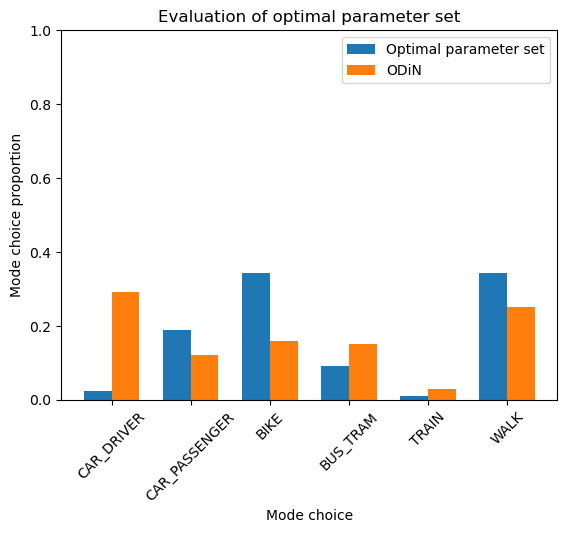

In [158]:
entry1 = optimal_parameterset_simulation.values.flatten().tolist()
entry2 = observed_values.values.flatten().tolist()
columns = optimal_parameterset_simulation.columns.tolist()

# Create a list of indices for the x-axis
x = range(len(columns))

# Plot the grouped bar chart using matplotlib
plt.bar(x, entry1, width=0.35, label='Optimal parameter set')
plt.bar([i + 0.35 for i in x], entry2, width=0.35, label='ODiN')
plt.xlabel('Mode choice')
plt.ylabel('Mode choice proportion')
plt.title('Evaluation of optimal parameter set')
plt.xticks([i + 0.35/2 for i in x], columns, rotation=45)
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()